# Data wrangling

This notebook is adapted from Joris Van den Bossche tutorial:

* https://github.com/paris-saclay-cds/python-workshop/blob/master/Day_1_Scientific_Python/02-pandas_introduction.ipynb

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8

## 1. Pandas: data analysis in python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

**What is `pandas`?**

* Pandas can be thought of as *NumPy arrays with labels* for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/


**When do you need pandas?**

When working with **tabular or structured data** (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

Pandas is great for working with heterogeneous and tabular 1D/2D data, but not all types of data fit in such structures!
<ul>
<li>When working with array data (e.g. images, numerical algorithms): just stick with numpy</li>
<li>When working with multidimensional labeled data (e.g. climate data): have a look at [xarray](http://xarray.pydata.org/en/stable/)</li>
</ul>
</div>

## 2. The pandas data structures: `DataFrame` and `Series`

### 2.1 The 2D table: pandas `DataFrame`

A `DataFrame` is a **tabular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.


<img align="left" width=50% src="./schema-dataframe.svg">

We can create a pandas Dataframe and specify the index and columns to use.

In [2]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


We can check that we are manipulating a Pandas DataFrame

In [3]:
type(df_countries)

pandas.core.frame.DataFrame

As previously mentioned, the dataframe stores information regarding the column and index information.

In [4]:
df_countries.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

In [5]:
df_countries.index

RangeIndex(start=0, stop=5, step=1)

You can get an overview of the information of a dataframe using the `info()` method:

In [6]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     5 non-null      object 
 1   population  5 non-null      float64
 2   area        5 non-null      int64  
 3   capital     5 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 288.0+ bytes


An information which is quite useful is related to the data type.

It is important to know that machine learning algorithms are based on mathematics and algebra. Thus, these algorithms expect numerical data.

Pandas allows to read, manipulate, explore, and transform heterogeneous data to numerical data.

In [7]:
df_countries.dtypes

country        object
population    float64
area            int64
capital        object
dtype: object

#### Exercise

We will define a set of 1D NumPy arrays containing the data that we will work with.

In [8]:
country_name = ['Austria', 'Iran, Islamic Rep.', 'France']
country_code = ['AUT', 'IRN', 'FRA']
gdp_2015 = [1349034029453.37, 385874474398.59, 2438207896251.84]
gdp_2017 = [1532397555.55556, 439513511620.591,2582501307216.42]

* Create a Python dictionary where the keys will be the name of the columns and the values will be the corresponding Python list.

In [9]:
# %load solutions/02_solutions.py
df = pd.DataFrame({'Country Name': country_name,
                   'Country Code': country_code,
                   2015: gdp_2015,
                   2017: gdp_2017})
df


,Country Name,Country Code,2015,2017
0,Austria,AUT,1.349034e+12,1.532398e+09
1,"Iran, Islamic Rep.",IRN,3.858745e+11,4.395135e+11
2,France,FRA,2.438208e+12,2.582501e+12


* Use the same procedure (Python dictionary) but specify that the country code should be used as the index. Therefore, check the parameter `index_col` or the method `DataFrame.set_index()`

In [10]:
# %load solutions/03_solutions.py
df = pd.DataFrame({'Country Name': country_name,
                   'Country Code': country_code,
                   2015: gdp_2015,
                   2017: gdp_2017})
df = df.set_index('Country Code')
df


,Country Name,2015,2017
Country Code,,,
AUT,Austria,1.349034e+12,1.532398e+09
IRN,"Iran, Islamic Rep.",3.858745e+11,4.395135e+11
FRA,France,2.438208e+12,2.582501e+12


In [11]:
# %load solutions/04_solutions.py
df = pd.DataFrame({'Country Name': country_name,
                   2015: gdp_2015,
                   2017: gdp_2017},
                  index=country_code)
df


,Country Name,2015,2017
AUT,Austria,1.349034e+12,1.532398e+09
IRN,"Iran, Islamic Rep.",3.858745e+11,4.395135e+11
FRA,France,2.438208e+12,2.582501e+12


### 2.2 One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**.

In [12]:
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [13]:
df_countries.loc[:, 'population']

0    11.3
1    64.3
2    81.3
3    16.9
4    64.9
Name: population, dtype: float64

In [14]:
population = df_countries.loc[:, 'population']

We can check that we manipulate a Pandas Series

In [15]:
type(population)

pandas.core.series.Series

### 2.3 Data import and export

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* (parquet)
* ...

In [16]:
# pd.read_xxxx

In [17]:
# df.to_xxxx

Very powerful csv reader:

In [18]:
pd.read_csv?

Luckily, if we have a well formed csv file, we don't need many of those arguments:

In [19]:
import os

In [20]:
df = pd.read_csv(os.path.join("data", "titanic.csv"))

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<div class="alert alert-success">

<b>EXERCISE</b>: Read the `data/20000101_20161231-NO2.csv` file into a DataFrame `no2`
<br><br>
Some aspects about the file:
 <ul>
  <li>Which separator is used in the file?</li>
  <li>The second row includes unit information and should be skipped (check `skiprows` keyword)</li>
  <li>For missing values, it uses the `'n/d'` notation (check `na_values` keyword)</li>
  <li>We want to parse the 'timestamp' column as datetimes (check the `parse_dates` keyword)</li>
</ul>
</div>

In [23]:
# %load solutions/22_solutions.py
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'],
                  index_col=0, parse_dates=True)
no2.head()


,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


In [24]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149039 entries, 2000-01-01 01:00:00 to 2016-12-31 23:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   BASCH   139949 non-null  float64
 1   BONAP   136493 non-null  float64
 2   PA18    142259 non-null  float64
 3   VERS    143813 non-null  float64
dtypes: float64(4)
memory usage: 5.7 MB


## 3. Selecting and filtering data

One of pandas' basic features is the labeling of rows and columns, but this makes indexing a bit complex. We now have to distinguish between:

* selection by **label**
* selection by **position**


### 3.1 Indexing by label using `.loc`

We will first select data from the dataframe selecting by **label**.

In [25]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data).set_index('country')
df_countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


The syntax to select by label is `.loc['row_name', 'col_name']`. Therefore, we can get a row of the dataframe by indicating the name of the index to select.

In [26]:
df_countries.loc['France', :]

population      64.3
area          671308
capital        Paris
Name: France, dtype: object

Similarly, we can get a column of the dataframe by indicating the name of the column.

In [27]:
df_countries.loc[:, 'area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

Specifying both index and column name, we will get the intersection of the row and the column.

In [28]:
df_countries.loc['France', 'area']

671308

We can get several columns by passing a list of the columns to be selected.

In [29]:
x = df_countries.loc['France', ['area', 'population']]

This is the exact same behavior with the index for the rows.

In [30]:
df_countries.loc[['France', 'Belgium'], ['area', 'population']]

,area,population
country,,
France,671308,64.3
Belgium,30510,11.3


You can go further and slice a portion of the dataframe.

In [31]:
df_countries.loc['France':'Netherlands', :]

,population,area,capital
country,,,
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam


Note that in this case, the first and last item of the slice are selected.

### 3.2  Indexing by position using `.iloc`

Sometimes, it is handy to select a portion of the data given the row and column indices number. We can this indexing by **position**.

In [32]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data).set_index('country')
df_countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


The syntax is similar to `.loc`. It will be `.iloc[row_id, col_id]`. We can get the first row.

In [33]:
df_countries.iloc[0, :]

population        11.3
area             30510
capital       Brussels
Name: Belgium, dtype: object

Or the last column.

In [34]:
df_countries.iloc[:, -1]

country
Belgium            Brussels
France                Paris
Germany              Berlin
Netherlands       Amsterdam
United Kingdom       London
Name: capital, dtype: object

And make the intersections.

In [35]:
df_countries.iloc[0, -1]

'Brussels'

Passing a list of indices is also working.

In [36]:
df_countries.iloc[[0, 1], [-2, -1]]

,area,capital
country,,
Belgium,30510,Brussels
France,671308,Paris


And we can use slicing as well.

In [37]:
df_countries.iloc[1:3, 0:2]

,population,area
country,,
France,64.3,671308
Germany,81.3,357050


However, be aware that the ending index of the slice is discarded.

### 3.3 Use the pandas shortcut

In [38]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data).set_index('country')
df_countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


Pandas provides a shortcut to select some part of the data.

In [39]:
df_countries['population']

country
Belgium           11.3
France            64.3
Germany           81.3
Netherlands       16.9
United Kingdom    64.9
Name: population, dtype: float64

In [40]:
df_countries[['area', 'capital']]

,area,capital
country,,
Belgium,30510,Brussels
France,671308,Paris
Germany,357050,Berlin
Netherlands,41526,Amsterdam
United Kingdom,244820,London


In [41]:
df_countries[2:5]

,population,area,capital
country,,,
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [42]:
df_countries['Germany':'United Kingdom']

,population,area,capital
country,,,
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


You don't need to use `loc` and `iloc`. The selection rules are:

* Passing a single label or list of labels will select a column or several columns;
* Passing a slice (label or indices) will select the corresponding rows.

You can always use the systematic indexing to avoid confusion. Use the shortcut at your own risk.

### 3.4 Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [43]:
df_countries['population'] > 60

country
Belgium           False
France             True
Germany            True
Netherlands       False
United Kingdom     True
Name: population, dtype: bool

In [44]:
mask_pop_above_60 = df_countries['population'] > 60

We can then use this mask to index a serie or a dataframe.

In [45]:
population = df_countries['population']

In [46]:
population.loc[mask_pop_above_60]

country
France            64.3
Germany           81.3
United Kingdom    64.9
Name: population, dtype: float64

In [47]:
population[mask_pop_above_60]

country
France            64.3
Germany           81.3
United Kingdom    64.9
Name: population, dtype: float64

In [48]:
df_countries.loc[mask_pop_above_60]

,population,area,capital
country,,,
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
United Kingdom,64.9,244820,London


In [49]:
df_countries[~mask_pop_above_60]

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
Netherlands,16.9,41526,Amsterdam


### 3.5 Exercise

In [50]:
df = pd.read_csv(os.path.join("data","titanic.csv"))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Select the sub-dataframe for which the men are older than 60 years old. Using the attribute shape, find how many individual correspond to this criteria.

In [51]:
# %load solutions/05_solutions.py
df[(df['Sex'] == 'male') & (df['Age'] > 60)].shape[0]


19

## 4. Statistical analysis

Pandas provides an easy and fast way to explore data. Let's explore the `titanic` data set.

In [52]:
df = df.set_index('Name')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


We will select the `Age` column and compute couple of statistic.

In [53]:
age = df['Age']
age

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
                                                       ... 
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64

In [54]:
age.mean()

29.69911764705882

In [55]:
age.max()

80.0

In [56]:
age.min()

0.42

In [57]:
age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [58]:
age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
         ..
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

<AxesSubplot:>

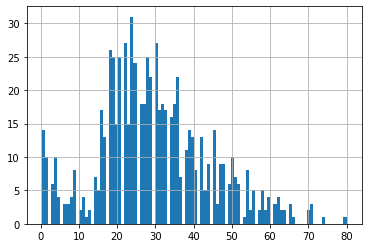

In [59]:
age.hist(bins=100)

### Exercise

* What is the maximum Fare that was paid? And the median?

In [60]:
# %load solutions/06_solutions.py
df['Fare'].max()


512.3292

In [61]:
# %load solutions/07_solutions.py
df['Fare'].median()


14.4542

* Calculate the average survival ratio for passengers (note: the 'Survived' column indicates whether someone survived (1) or not (0)).

In [62]:
# %load solutions/08_solutions.py
df['Survived'].sum() / df.shape[0]


0.3838383838383838

In [63]:
# %load solutions/09_solutions.py
df['Survived'].mean()


0.3838383838383838

* Select the sub-dataframe for which the men are older than 60 years old.

In [64]:
# %load solutions/10_solutions.py
((df['Age'] > 60) & (df['Sex'] == 'male')).value_counts()[True]


19

* Based on the titanic data set, select all rows for male passengers and calculate the mean age of those passengers. Do the same for the female passengers.

In [65]:
# %load solutions/11_solutions.py
df[df['Sex'] == 'male']['Age'].mean()


30.72664459161148

In [66]:
# %load solutions/12_solutions.py
df[df['Sex'] == 'female']['Age'].mean()


27.915708812260537

* Plot the Fare distribution.

<AxesSubplot:>

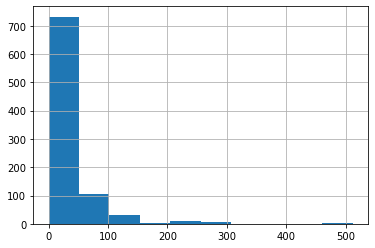

In [67]:
# %load solutions/13_solutions.py
df['Fare'].hist()


## 5. The group-by operation

### Some 'theory': the groupby operation (split-apply-combine)

In [68]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
...,...,...
5,C,15
6,A,10
7,B,15
8,C,20


### 5.1 Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [69]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [70]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### 5.2 Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="./splitApplyCombine.png">

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [71]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [72]:
df.groupby('key').aggregate([np.sum, np.median])  # 'sum'

data       
     sum median
key            
A     15      5
B     30     10
C     45     15

And many more methods are available. 

In [73]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

In [74]:
for group_name, group_df in df.groupby('key'):
    print(group_name)
    print(group_df)

A
  key  data
0   A     0
3   A     5
6   A    10
B
  key  data
1   B     5
4   B    10
7   B    15
C
  key  data
2   C    10
5   C    15
8   C    20


### 5.3 Exercise: Application of the groupby concept on the titanic data

We go back to the titanic passengers survival data:

In [75]:
df = pd.read_csv("data/titanic.csv")
df = df.set_index('Name')

In [76]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


* Using `groupby()`, calculate the average age for each sex.</li>


In [77]:
# %load solutions/14_solutions.py
df.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

* Using the `groupby()` function, plot the age distribution for each sex.

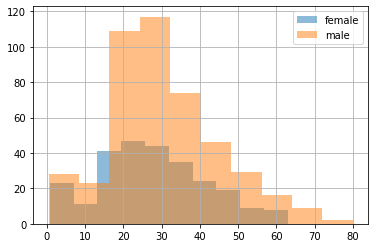

In [78]:
# %load solutions/15_solutions.py
_ = df.groupby("Sex")["Age"].hist(alpha=0.5, legend=True)

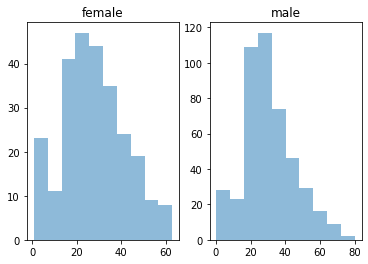

In [79]:
fig, axs = plt.subplots(ncols=2)
for plt_idx, (group_name, group_df) in enumerate(df.groupby('Sex')):
    axs[plt_idx].hist(group_df["Age"], alpha=0.5, label=group_name)
    axs[plt_idx].set_title(group_name)
# _ = plt.legend()

* Plot the fare distribution based on the class.

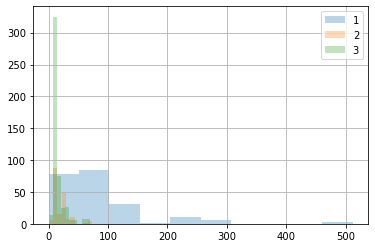

In [80]:
# %load solutions/16_solutions.py
_ = df.groupby("Pclass")["Fare"].hist(alpha=0.3, legend=True)

* Plot the survival rate by class with a bar plot.

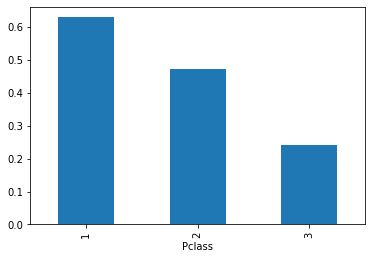

In [81]:
# %load solutions/17_solutions.py
_ = df.groupby("Pclass")["Survived"].mean().plot(kind="bar")

* Compute the survival rate grouping by class and sex. (Hint: you can pass a list to the `groupby` function)

In [82]:
# %load solutions/18_solutions.py
df.groupby(["Sex", "Pclass"])["Survived"].mean().to_frame()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

## 7. Merging different source of information

### 7.1 Simple concatenation

In [83]:
# series
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 
                        'United Kingdom': 64.9, 'Netherlands': 16.9})

# dataframe
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


Assume we have some similar data as in countries, but for a set of different countries:

In [84]:
data = {'country': ['Nigeria', 'Rwanda', 'Egypt', 'Morocco', ],
        'population': [182.2, 11.3, 94.3, 34.4],
        'area': [923768, 26338 , 1010408, 710850],
        'capital': ['Abuja', 'Kigali', 'Cairo', 'Rabat']}
countries_africa = pd.DataFrame(data)
countries_africa

,country,population,area,capital
0,Nigeria,182.2,923768,Abuja
1,Rwanda,11.3,26338,Kigali
2,Egypt,94.3,1010408,Cairo
3,Morocco,34.4,710850,Rabat


We now want to combine the rows of both datasets:

In [85]:
pd.concat([countries, countries_africa])

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
...,...,...,...,...
0,Nigeria,182.2,923768,Abuja
1,Rwanda,11.3,26338,Kigali
2,Egypt,94.3,1010408,Cairo
3,Morocco,34.4,710850,Rabat


If we don't want the index to be preserved:

In [86]:
pd.concat([countries, countries_africa], ignore_index=True)

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
...,...,...,...,...
5,Nigeria,182.2,923768,Abuja
6,Rwanda,11.3,26338,Kigali
7,Egypt,94.3,1010408,Cairo
8,Morocco,34.4,710850,Rabat


When the two dataframes don't have the same set of columns, by default missing values get introduced:

In [87]:
pd.concat([countries_africa[['country', 'capital']], countries], ignore_index=True)

,country,capital,population,area
0,Nigeria,Abuja,NaN,NaN
1,Rwanda,Kigali,NaN,NaN
2,Egypt,Cairo,NaN,NaN
3,Morocco,Rabat,NaN,NaN
...,...,...,...,...
5,France,Paris,64.3,671308.0
6,Germany,Berlin,81.3,357050.0
7,Netherlands,Amsterdam,16.9,41526.0
8,United Kingdom,London,64.9,244820.0


## 7.2 Combining columns instead of rows

Assume we have another DataFrame for the same countries, but with some additional statistics:

In [88]:
data = {'country': ['Belgium', 'France', 'Netherlands'],
        'GDP': [496477, 2650823, 820726],
        'area': [8.0, 9.9, 5.7]}
country_economics = pd.DataFrame(data).set_index('country')
country_economics

,GDP,area
country,,
Belgium,496477,8.0
France,2650823,9.9
Netherlands,820726,5.7


In [89]:
pd.concat([countries, country_economics], axis=1)

,country,population,area,capital,GDP,area
0,Belgium,11.3,30510.0,Brussels,NaN,NaN
1,France,64.3,671308.0,Paris,NaN,NaN
2,Germany,81.3,357050.0,Berlin,NaN,NaN
3,Netherlands,16.9,41526.0,Amsterdam,NaN,NaN
4,United Kingdom,64.9,244820.0,London,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,496477.0,8.0
France,NaN,NaN,NaN,NaN,2650823.0,9.9
Netherlands,NaN,NaN,NaN,NaN,820726.0,5.7


`pd.concat` matches the different objects based on the index:

In [90]:
countries2 = countries.set_index('country')

In [91]:
countries2

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [92]:
pd.concat([countries2, country_economics], axis=1)

,population,area,capital,GDP,area
Belgium,11.3,30510,Brussels,496477.0,8.0
France,64.3,671308,Paris,2650823.0,9.9
Germany,81.3,357050,Berlin,NaN,NaN
Netherlands,16.9,41526,Amsterdam,820726.0,5.7
United Kingdom,64.9,244820,London,NaN,NaN


### 7.3 Dataframe merging 

Using `pd.concat` above, we combined datasets that had the same columns or the same index values. But, another typical case if where you want to add information of second dataframe to a first one based on one of the columns. That can be done with `pd.merge`.

Let's look again at the titanic passenger data, but taking a small subset of it to make the example easier to grasp:

In [93]:
df = pd.read_csv("./data/titanic.csv")
df = df.loc[:9, ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

In [94]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
...,...,...,...,...,...,...
6,0,1,male,54.0,51.8625,S
7,0,3,male,2.0,21.0750,S
8,1,3,female,27.0,11.1333,S
9,1,2,female,14.0,30.0708,C


Assume we have another dataframe with more information about the 'Embarked' locations:

In [95]:
locations = pd.DataFrame({'Embarked': ['S', 'C', 'Q', 'N'],
                          'City': ['Southampton', 'Cherbourg', 'Queenstown', 'New York City'],
                          'Country': ['United Kindom', 'France', 'Ireland', 'United States']})

In [96]:
locations

,Embarked,City,Country
0,S,Southampton,United Kindom
1,C,Cherbourg,France
2,Q,Queenstown,Ireland
3,N,New York City,United States


We now want to add those columns to the titanic dataframe, for which we can use `pd.merge`, specifying the column on which we want to merge the two datasets:

In [97]:
pd.merge(df, locations, how="right")

,Survived,Pclass,Sex,Age,Fare,Embarked,City,Country
0,0.0,3.0,male,22.0,7.2500,S,Southampton,United Kindom
1,1.0,3.0,female,26.0,7.9250,S,Southampton,United Kindom
2,1.0,1.0,female,35.0,53.1000,S,Southampton,United Kindom
3,0.0,3.0,male,35.0,8.0500,S,Southampton,United Kindom
...,...,...,...,...,...,...,...,...
7,1.0,1.0,female,38.0,71.2833,C,Cherbourg,France
8,1.0,2.0,female,14.0,30.0708,C,Cherbourg,France
9,0.0,3.0,male,NaN,8.4583,Q,Queenstown,Ireland
10,NaN,NaN,NaN,NaN,NaN,N,New York City,United States


In this case we use `how='left'` (a "left join") because we wanted to keep the original rows of df and only add matching values from locations to it. Other options are 'inner', 'outer' and 'right' (see the docs for more on this).

In [98]:
pd.merge(df, locations, left_on="Embarked", right_on="Embarked")

,Survived,Pclass,Sex,Age,Fare,Embarked,City,Country
0,0,3,male,22.0,7.2500,S,Southampton,United Kindom
1,1,3,female,26.0,7.9250,S,Southampton,United Kindom
2,1,1,female,35.0,53.1000,S,Southampton,United Kindom
3,0,3,male,35.0,8.0500,S,Southampton,United Kindom
...,...,...,...,...,...,...,...,...
6,1,3,female,27.0,11.1333,S,Southampton,United Kindom
7,1,1,female,38.0,71.2833,C,Cherbourg,France
8,1,2,female,14.0,30.0708,C,Cherbourg,France
9,0,3,male,NaN,8.4583,Q,Queenstown,Ireland


## 8. Working with time series data

### 8.1 Time series preamble

In [99]:
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';',
                  skiprows=[1], na_values=['n/d'],
                  index_col=0, parse_dates=True)

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [100]:
no2.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


In [101]:
no2.index

DatetimeIndex(['2000-01-01 01:00:00', '2000-01-01 02:00:00',
               '2000-01-01 03:00:00', '2000-01-01 04:00:00',
               '2000-01-01 05:00:00', '2000-01-01 06:00:00',
               '2000-01-01 07:00:00', '2000-01-01 08:00:00',
               '2000-01-01 09:00:00', '2000-01-01 10:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=149039, freq=None)

Indexing a time series works with strings:

In [102]:
no2["2010-01-01 09:00":"2010-01-01 12:00"]

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2010-01-01 09:00:00,31.0,27.0,28.0,14.0
2010-01-01 10:00:00,41.0,31.0,30.0,14.0
2010-01-01 11:00:00,48.0,32.0,33.0,16.0
2010-01-01 12:00:00,63.0,33.0,39.0,19.0


A nice feature is "partial string" indexing, so you don't need to provide the full datetime string.

E.g. all data of January up to March 2012:

In [103]:
no2['2012-01':'2012-03']

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2012-01-01 00:00:00,44.0,34.0,32.0,7.0
2012-01-01 01:00:00,56.0,35.0,29.0,9.0
2012-01-01 02:00:00,50.0,36.0,29.0,7.0
2012-01-01 03:00:00,46.0,34.0,22.0,8.0
...,...,...,...,...
2012-03-31 20:00:00,61.0,55.0,29.0,17.0
2012-03-31 21:00:00,46.0,49.0,32.0,14.0
2012-03-31 22:00:00,56.0,41.0,27.0,14.0
2012-03-31 23:00:00,59.0,51.0,29.0,13.0


Time and date components can be accessed from the index:

In [104]:
no2.index.hour

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='timestamp', length=149039)

In [105]:
no2.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='timestamp', length=149039)

In [106]:
no2.index.month.unique()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='timestamp')

### 8.2 The power of pandas: `resample`

A very powerful method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

Remember the air quality data:

<AxesSubplot:xlabel='timestamp'>

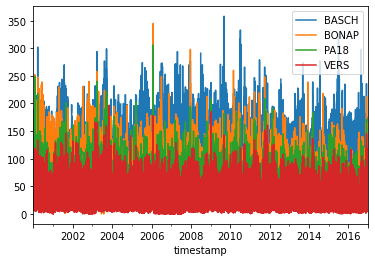

In [107]:
no2.plot()

The time series has a frequency of 1 hour. I want to change this to daily:

In [108]:
no2.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


<AxesSubplot:xlabel='timestamp'>

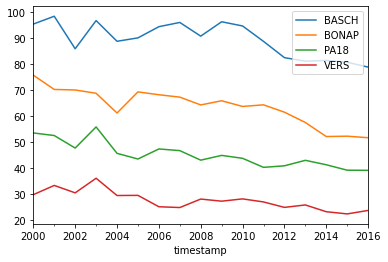

In [109]:
no2.resample('Y').mean().plot()

Above I take the mean, but as with `groupby` I can also specify other methods:

In [110]:
no2.resample('D').max().head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01,109.0,62.0,77.0,59.0
2000-01-02,109.0,96.0,78.0,45.0
2000-01-03,120.0,102.0,72.0,37.0
2000-01-04,115.0,107.0,78.0,43.0
2000-01-05,141.0,115.0,82.0,41.0


The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases  
These strings can also be combined with numbers, eg `'10D'`.

Further exploring the data:

<AxesSubplot:xlabel='timestamp'>

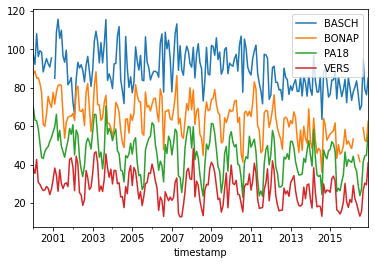

In [111]:
no2.resample('M').mean().plot() # 'A'

<AxesSubplot:xlabel='timestamp'>

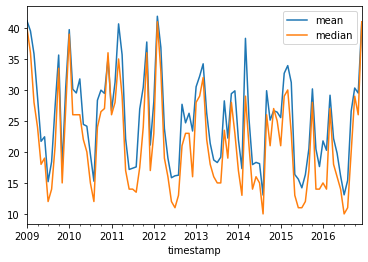

In [112]:
no2.loc['2009':, 'VERS'].resample('M').aggregate(['mean', 'median']).plot()

### 8.3 Exercise

The evolution of the yearly averages with, and the overall mean of all stations

* Use `resample` and `plot` to plot the yearly averages for the different stations.
* The overall mean of all stations can be calculated by taking the mean of the different columns (`.mean(axis=1)`).


<AxesSubplot:xlabel='timestamp'>

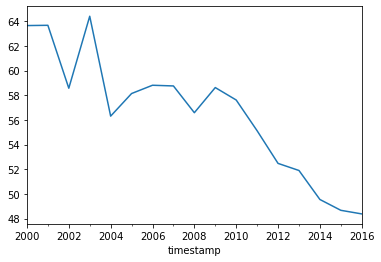

In [113]:
no2.resample("Y").mean().mean(axis=1).plot()


## Further reading

* Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/

* Books

    * "Python for Data Analysis" by Wes McKinney
    * "Python Data Science Handbook" by Jake VanderPlas

* Tutorials (many good online tutorials!)

  * https://github.com/jorisvandenbossche/pandas-tutorial
  * https://github.com/brandon-rhodes/pycon-pandas-tutorial

* Tom Augspurger's blog

  * https://tomaugspurger.github.io/modern-1.html